## Exploratory Data Analysis on Taylor Swift Lyrics

In this analysis we will be looking at the Taylor Swift Lyrics data set. The data inside the data set comes from all of Taylor Swift's studio albums until 2017, a total of 6 albums and 94 songs. 

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from wordcloud import WordCloud
import string
import collections
from collections import Counter

In [2]:
# Import the data set

df = pd.read_csv('taylor_swift_lyrics.csv',encoding = "ANSI")
df

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
...,...,...,...,...,...,...,...
4857,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",43,2017
4858,Taylor Swift,reputation,New Year's Day,15,Please don't ever become a stranger,44,2017
4859,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",45,2017
4860,Taylor Swift,reputation,New Year's Day,15,Whose laugh I could recognize anywhere,46,2017


### Data cleansing

#### Missing Data

Let's check if there are any missing values in the data set.

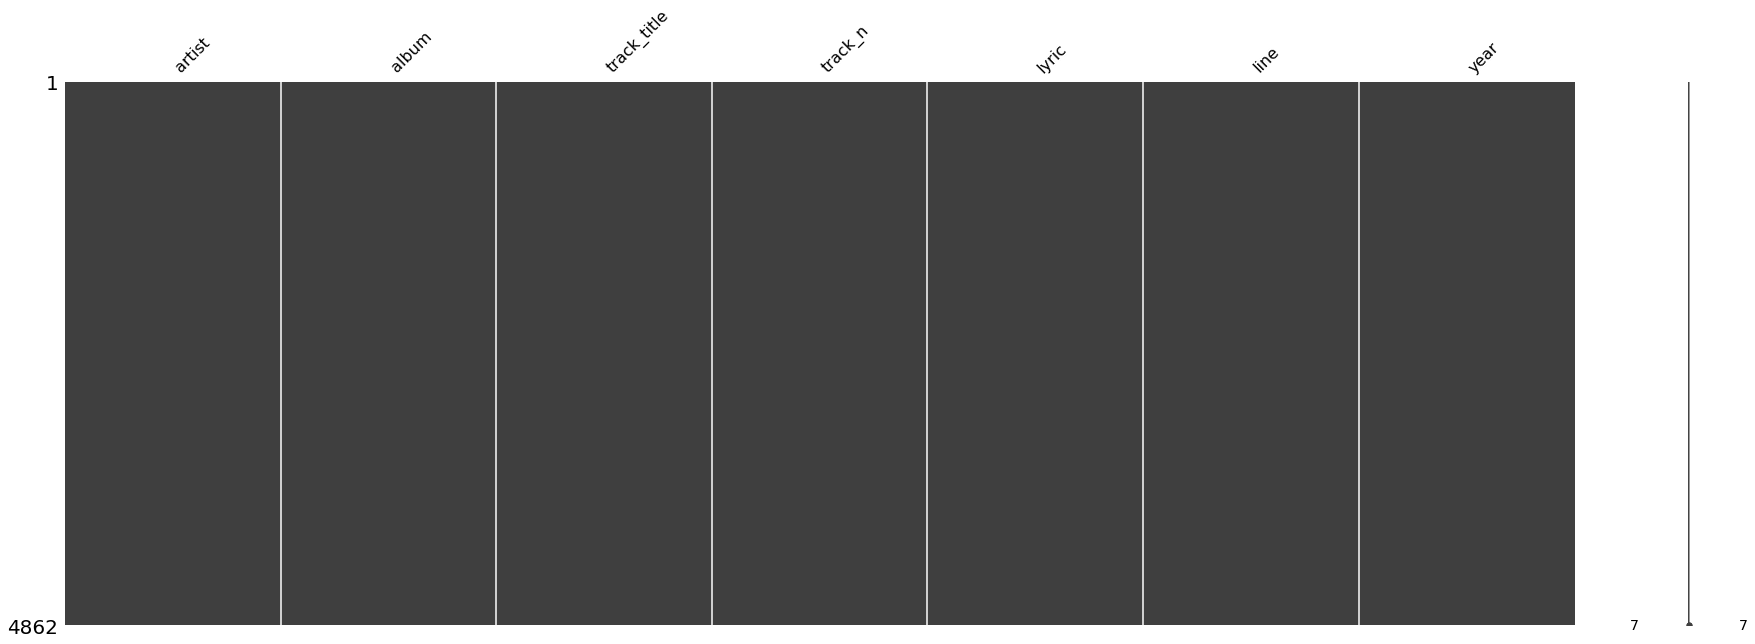

In [3]:
# Find the missing values
missingno.matrix(df, figsize = (30,10))

Wonderful, there are no missing values. But let's also make sure that there are no repeating rows.

#### Removing duplicate rows

In [4]:
# Remove any rows that have the same data in all columns
df = df.drop_duplicates(keep='first')

#### Remove redundant or unnecessary columns

This data set is pretty straightforward, but let's drop the 'artist' column, 'track_n' column, as well as the 'line' column.

In [5]:
# Remove the redundant or unnecessary columns
df = df.drop(columns=['artist',
                      'track_n',
                      'line'
                     ])

#### Check data types

Let's make sure that the columns are in the correct format for our analysis.

In [6]:
# Check the data types
df.dtypes

album          object
track_title    object
lyric          object
year            int64
dtype: object

#### Formatting the lyrics

One last thing before we begin, let's make the lyrics easier to work with by merging each song's lyrics into one row, instead of breaking them up line by line. Let's also remove the punctuation and make it all lowercase.

In [7]:
# Merge the lyrics for each song
df = df.groupby(['year','album','track_title'])['lyric'].apply(lambda x: ' '.join(x.astype(str))).reset_index()

# Remove punctuation from the lyrics
punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
transtab = str.maketrans(dict.fromkeys(punc, ''))
df['lyric'] = '|'.join(df['lyric'].tolist()).translate(transtab).split('|')

# Make it lowercase
df['lyric'] = df['lyric'].str.lower()

df

,year,album,track_title,lyric
0,2006,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...
1,2006,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...
2,2006,Taylor Swift,Cold as You,you have a way of coming easily to me and when...
3,2006,Taylor Swift,I'm Only Me When I'm With You,friday night beneath the stars in a field behi...
4,2006,Taylor Swift,Invisible,she cant see the way your eyes light up when y...
...,...,...,...,...
89,2017,reputation,King of My Heart,im perfectly fine i live on my own i made up m...
90,2017,reputation,Look What You Made Me Do,i dont like your little games dont like your t...
91,2017,reputation,New Year's Day,theres glitter on the floor after the party gi...
92,2017,reputation,So It Goes...,see you in the dark all eyes on you my magicia...


### Time to explore

#### Tracks per album

Great, let's begin the analysis with seeing how many tracks are included in each album.

Text(0.5, 1.0, 'Number of tracks per album')

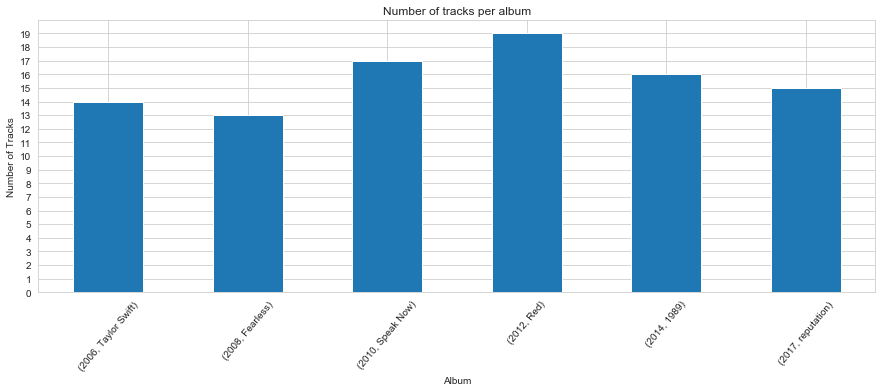

In [8]:
# Count the number of tracks per album
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax = df.groupby(['year','album'])['track_title'].nunique().plot(kind='bar')

plt.xticks(rotation=50)
ax.set_yticks(np.arange(0,20,step=1))
ax.set_xlabel("Album")
ax.set_ylabel("Number of Tracks")
ax.set_title('Number of tracks per album')

So, we can see that the most tracks on one album was 19 and the lowest number of tracks on an album was 13. 

#### Lyrics per track

Next, let's see how many words have been used in the lyrics for each song, as well as how many unique words are used.

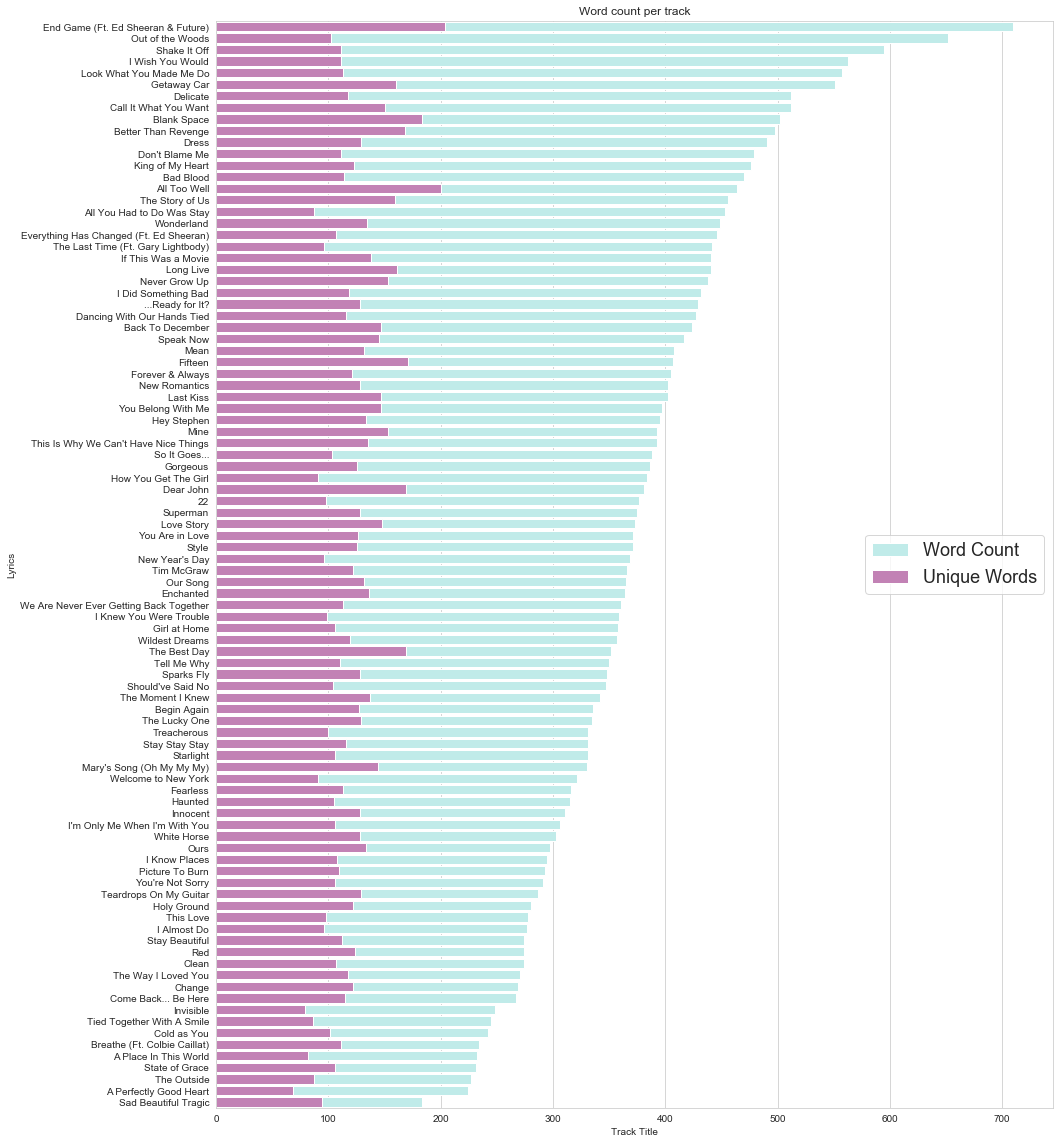

In [9]:
# Split list into new series
lyrics = df['lyric'].str.split()

# Get amount of words
df['word_count'] = lyrics.apply(len)

# Get amount of unique words
df['unique_words'] = lyrics.apply(set).apply(len)

# Sort the songs by the amount of lyrics
df_lyrics = df.sort_values('word_count', ascending=False)

# Initialise the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Plot the word count
sns.set_color_codes("pastel")
sns.barplot(y='track_title', x='word_count', data=df_lyrics, label='Word Count', color="c")

# Plot the unique words
sns.set_color_codes("colorblind")
sns.barplot(y='track_title', x='unique_words', data=df_lyrics, label='Unique Words', color="m")

# Add a legend
ax.set_xlabel("Track Title")
ax.set_ylabel("Lyrics")
ax.set_title('Word count per track')
ax.legend(loc="center right", frameon=True, fontsize='18')

Although the amount of lyrics in the songs vary from below 200 to over 700, it appears that the unique words variance is not as great as the total word count. This is common in pop music, where there is much repetition used in the lyrics, especially over the chorus sections of the songs.

#### Unique lyrics per album

This visual is a lot to take in, so let's simplify a little bit by looking at the unique lyrics by album.

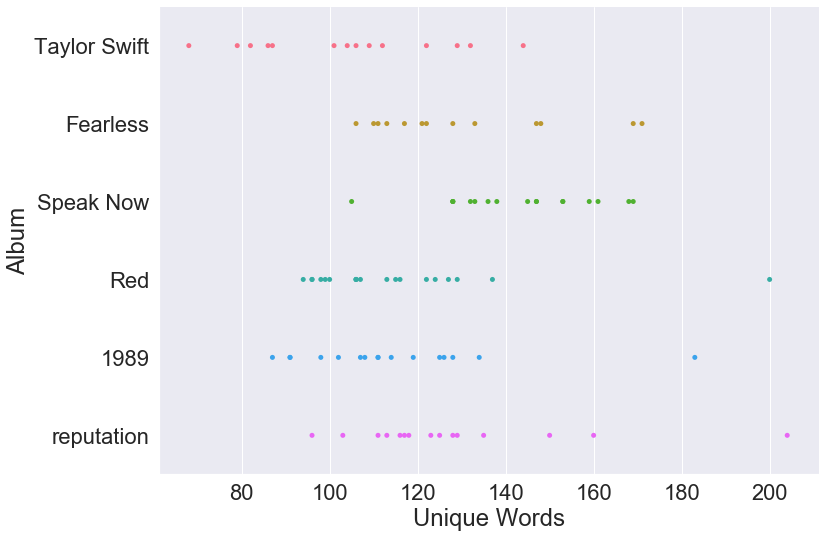

In [22]:
# Create catplot to show lyrics per album
sns.set(font_scale=2)
g = sns.catplot(x="unique_words", y="album", jitter=False, data=df, height=8, aspect=1.5, palette='husl')
g.set_axis_labels("Unique Words", "Album")

A much easier plot to look at, and we can see that the 'reputation' album has the song with the most unique lyrics, with the 'Red' album coming in at a close second. 

One thing to note about the song with the most unique words used ('End Game') is that there are two other featured artists in the song, namely Ed Sheeran and Future. How much the featured artists contributed to the song is unknown right now, but it is definitely something to keep in mind.

#### Most popular words used

With all of this repetition, let's see which words are used the most.

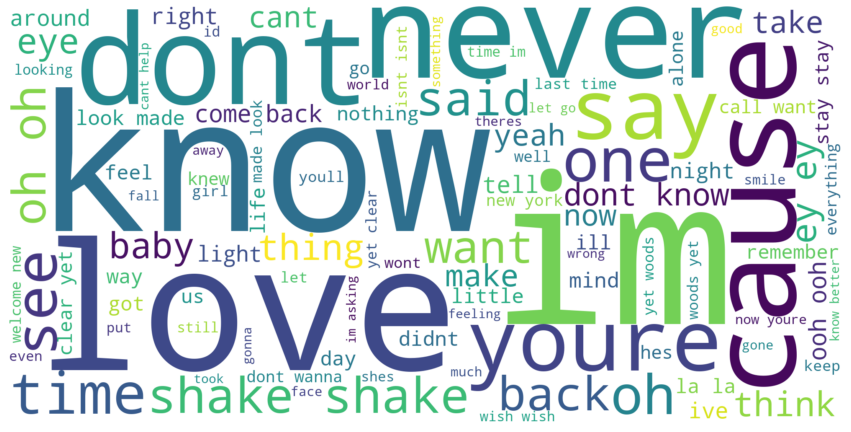

In [11]:
# Create a word cloud with the most used words in the lyrics
text = " ".join(word for word in df.lyric)

plt.figure(figsize=(15,10))
wordcloud = WordCloud(max_words=100, background_color="white",width=2000, height=1000).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

And here we have the 100 most used words in Taylor Swift songs. Honestly, I'm surprised that 'shake' (from 'Shake it Off') is not the biggest word in the word cloud, but I suppose this makes sense, as Taylor Swift sings about love more than she does about shaking.

Something to note about word clouds is that it does use stopwords, common words that it filters out and prevents them from appearing in the word cloud image.  Let's take a quick look at the 'real' most used words.

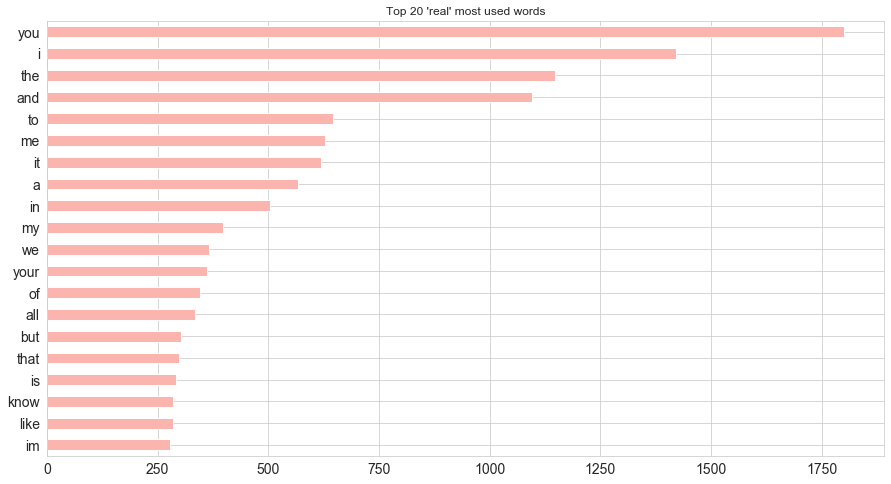

In [12]:
# Create a series of all the lyrics
text = " ".join(word for word in df.lyric)
text = text.split()
pd_count = pd.Series(text)

# Create a bar graph showing the top 20 most used words
plt.figure(figsize=(15,8))
pd_count.value_counts().head(20).plot(kind='barh', 
                                      title="Top 20 'real' most used words", 
                                      fontsize=14, colormap='Pastel1').invert_yaxis()

It appears that the list of 'real' most used words is a bit more boring than the word cloud. At least the word cloud gives you a sense of what the songs are about, showing that the stopwords do have value when used in the right context. I suppose the 'real' words give you a sense that Taylor Swift is usually writing a song about or for someone else, and she is singing from her own perspective.

#### Lyrics over time

Let's see if the amount of lyrics per album increased over the years or not. We'll look at both the total word count and the unique words per album.

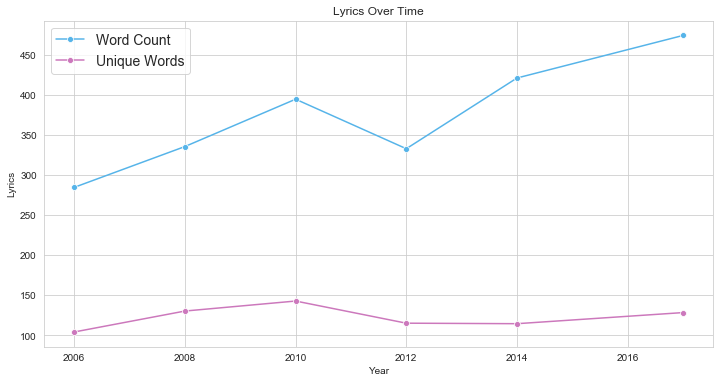

In [13]:
# Create a line graph showing the amount of lyrics (total and unique) over the years
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="year", y="word_count", marker='o', data=df, label='Word Count', ci=None, color='c')

sns.set_color_codes("colorblind")
sns.lineplot(x="year", y="unique_words", marker='o', data=df, label='Unique Words', ci=None, color='m')

ax.set_xlabel("Year")
ax.set_ylabel("Lyrics")
ax.set_title('Lyrics Over Time')
ax.legend(loc="upper left", frameon=True, fontsize='14')

It appears that the number of unique words does not change much over the years, but the total number of words changes quite drastically. It is possible that it is due to the transition of genres from country music to pop music that the word count grows while the uniqueness remains roughly the same. 

Surprisingly, the dip in word count in 2012 is the same album that has the most tracks (19), where you would assume that that album would have the most.